In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def noise_pow_spec(ω, ω_c, κ, r, g, Q, Δ, nc, nT):
    a = nc - nT
    num = κ * r * g ** 2
    den_b = ((r ** 2 / 4) + ω ** 2) * ((κ + ω_c / Q) ** 2 / 4 + (ω - Δ) ** 2)
    den_c = (r * (κ + ω_c / Q) / 2 - 2 * ω * (ω - Δ))

    return nT + a * num / (den_b + g ** 2 * den_c + g ** 4)

In [53]:
# Define parameters - just use dummy ones for now
κ = 5e6                                                                  # output coupling rate of the cavity
r = np.linspace(0.1e6, 1e6, 1000)                           # effective cooling rate term
g = r                                                                    # collective interaction rate b/w cavity and spins
ω = np.linspace(0.1, 10, 100)                                            # RWA frequency in GHz
ωc = 2.87 * 2 * np.pi * 1e9                                              # mode frequency in Hz
Δ = 0                                                                   # cavity-spin detuning
Q = np.linspace(0.1e5, 1e5, 1000)
γ = ωc / Q                                                               # internal loss rate of cavity
T = 300                                                                   # room temperature in K
P = 0.8                                                                  # polarization of spin bath
hbar_ov_k = 7.639e-12                                                    # units are s * K

In [54]:
# Calculate room temperature number of photons
nT = (np.exp(hbar_ov_k * ωc * 2 * np.pi / T) - 1) ** -1

In [55]:
# Calculate the cold spin bath photon number
nc = 0.5 * (1 - P) / P

In [56]:
# Need to create mesh grid of g and q values
Qm, gm = np.meshgrid(Q, g)

In [57]:
# Calculate noise power spectrum
NP = noise_pow_spec(0, ωc, κ, gm, gm, Qm, Δ, nc, nT)

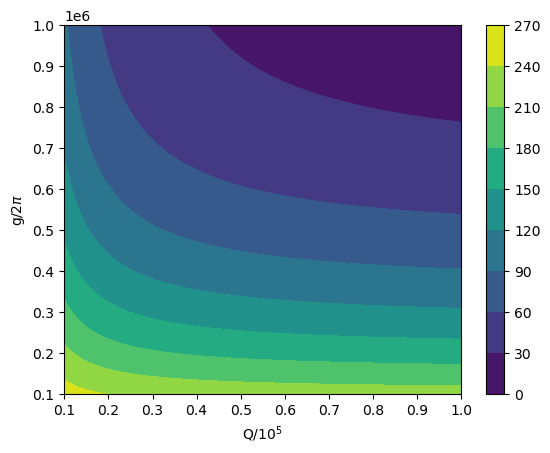

In [58]:
plt.contourf(Qm, gm, NP / nT * T)
plt.xticks([i * 1e4 for i in range(1, 11)], [f'{0.1*i:.1f}' for i in range(1, 11)])
plt.xlabel("Q/$10^5$")
plt.ylabel("g/2$\pi$")
plt.colorbar()

In [59]:
# According to paper, thermal noise goes as NP = k * T * B where B is the bandwidth.  The paper uses 30 kHz for B
B = 30e3
k = 1.381e-23
calc_T = NP / (k * B)

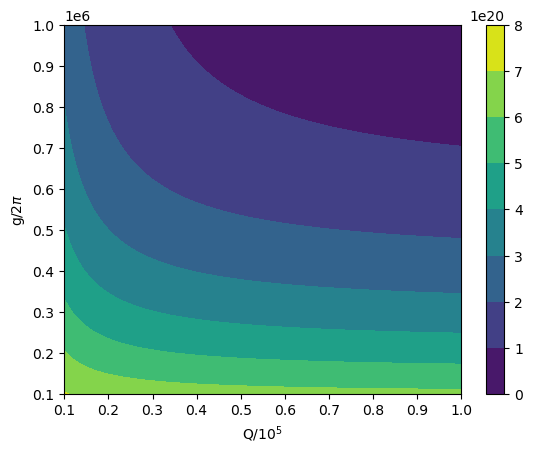

In [60]:
plt.contourf(Qm, gm, calc_T)
plt.xticks([i * 1e4 for i in range(1, 11)], [f'{0.1*i:.1f}' for i in range(1, 11)])
plt.xlabel("Q/$10^5$")
plt.ylabel("g/2$\pi$")
plt.colorbar()